In [1]:
# Підключення необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam

In [2]:
# Завантаження даних MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Розгортання зображень у вектори
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [4]:
# Параметри автокодувальника
input_dim = 784  # 28*28
encoding_dim = 64  # Розмір прихованого шару

In [5]:
# Побудова автокодувальника без шуму
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)


In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [7]:
# Навчання автокодувальника без шуму
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3501 - val_loss: 0.1617
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1515 - val_loss: 0.1248
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1212 - val_loss: 0.1069
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1051 - val_loss: 0.0964
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0952 - val_loss: 0.0892
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0891 - val_loss: 0.0845
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0848 - val_loss: 0.0814
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0815 - val_loss: 0.0791
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0796 - val_loss: 0.0776
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0781 - val_loss: 0.0765
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0771 - val_loss: 0.0756
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

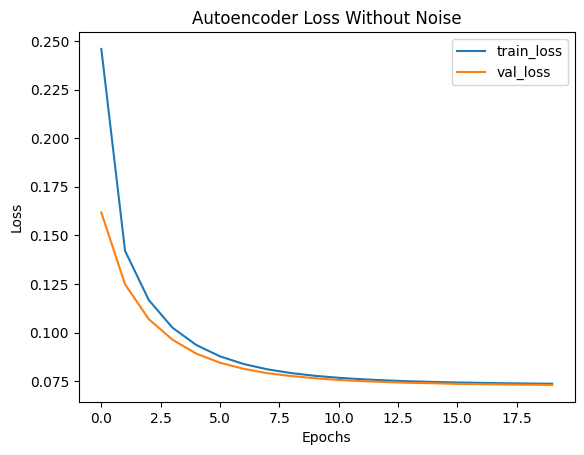

In [8]:
# Побудова графіку втрат для автокодувальника без шуму
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Loss Without Noise')
plt.legend()
plt.show()

In [9]:
# Побудова автокодувальника з шумом
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [10]:
# Використаємо ту ж саму структуру автокодувальника
autoencoder_noisy = Model(input_img, decoded)
autoencoder_noisy.compile(optimizer=Adam(), loss='binary_crossentropy')

In [11]:
# Навчання автокодувальника з шумом
history_noisy = autoencoder_noisy.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.1548 - val_loss: 0.1267
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1254 - val_loss: 0.1202
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1199 - val_loss: 0.1168
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1164 - val_loss: 0.1146
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1146 - val_loss: 0.1133
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1134 - val_loss: 0.1128
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1128 - val_loss: 0.1121
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1123 - val_loss: 0.1118
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1116 - val_loss: 0.1116
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1114 - val_loss: 0.1114
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.1112 - val_loss: 0.1113
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

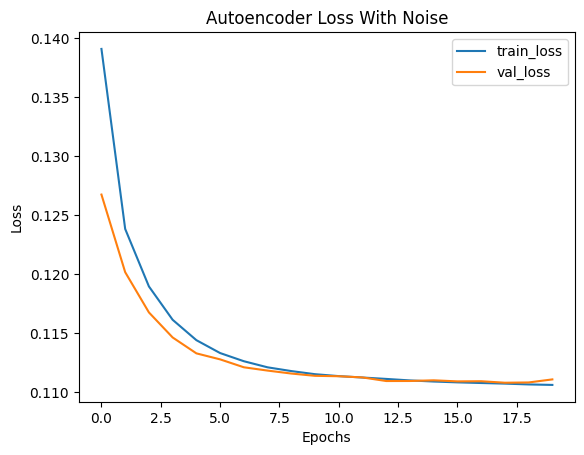

In [12]:
# Побудова графіку втрат для автокодувальника з шумом
plt.plot(history_noisy.history['loss'], label='train_loss')
plt.plot(history_noisy.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Loss With Noise')
plt.legend()
plt.show()

In [13]:
# Візуалізація розподілу векторів прихованого шару
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


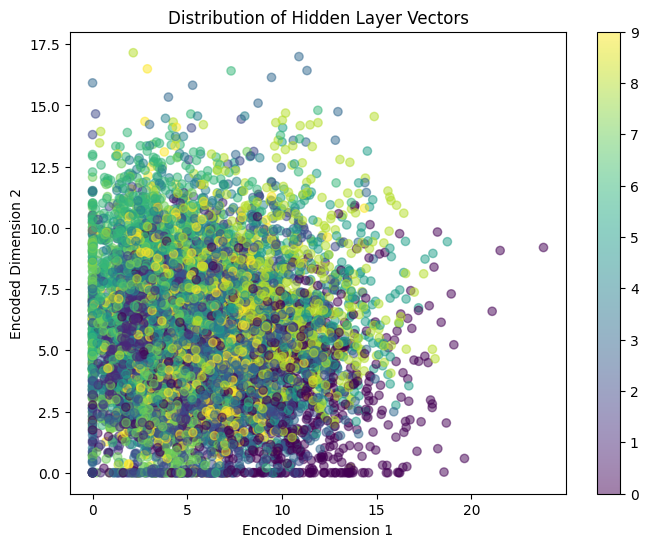

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=_[:10000], cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('Distribution of Hidden Layer Vectors')
plt.show()